 # ** Prediction of Olympic Medals**

## Importing Libraries


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import tensorflow as tf
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## Reading Dataset

In [2]:
data = pd.read_csv(r'C:\Users\Admin\Desktop\athlete_events.csv')

In [3]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,570,Pedro Abreu Pascal,M,23.0,200.0,88.0,Cuba,CUB,1980 Summer,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,NaN
1019,571,Rubn Abreu Rivero,M,24.0,177.0,71.0,Venezuela,VEN,1996 Summer,1996,Summer,Atlanta,Cycling,"Cycling Men's Road Race, Individual",NaN
1020,572,Rui Pinto de Abreu,M,15.0,177.0,64.0,Portugal,POR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 400 metres Freestyle,NaN
1021,572,Rui Pinto de Abreu,M,15.0,177.0,64.0,Portugal,POR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,NaN


## Data Inspecting and Cleaning

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1023 non-null   int64  
 1   Name    1023 non-null   object 
 2   Sex     1023 non-null   object 
 3   Age     959 non-null    float64
 4   Height  773 non-null    float64
 5   Weight  776 non-null    float64
 6   Team    1023 non-null   object 
 7   NOC     1023 non-null   object 
 8   Games   1023 non-null   object 
 9   Year    1023 non-null   int64  
 10  Season  1023 non-null   object 
 11  City    1023 non-null   object 
 12  Sport   1023 non-null   object 
 13  Event   1023 non-null   object 
 14  Medal   112 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 120.0+ KB


In [5]:
data.describe()

,ID,Age,Height,Weight,Year
count,1023.000000,959.000000,773.000000,776.000000,1023.000000
mean,284.633431,25.459854,175.839586,71.772552,1983.036168
std,174.918218,5.892230,10.014246,13.897881,27.231803
min,1.000000,14.000000,147.000000,40.000000,1900.000000
25%,127.500000,21.000000,169.000000,62.000000,1968.000000
50%,285.000000,24.000000,176.000000,72.000000,1992.000000
75%,439.500000,28.000000,183.000000,80.000000,2004.000000
max,572.000000,57.000000,210.000000,130.000000,2016.000000


In [6]:
data.shape

(1023, 15)

In [7]:
data['Medal'].value_counts()

Gold      45
Bronze    34
Silver    33
Name: Medal, dtype: int64

In [8]:
data['Team'].value_counts()

Egypt            189
Norway            59
United States     41
Finland           34
Japan             27
                ... 
Uruguay            1
Angola             1
Denmark            1
France-1           1
Eritrea            1
Name: Team, Length: 115, dtype: int64

In [9]:
# To fill missing values in Medal column
data['Medal'] = data['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)


In [10]:
data.isnull().sum()

ID          0
Name        0
Sex         0
Age        64
Height    250
Weight    247
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64

In [11]:
# Drop Uncessary columns
data = data.drop(['ID', 'Name', 'Games'], axis=1)


In [12]:
# Checking null values in the data 
data.isna().mean()


Sex       0.000000
Age       0.062561
Height    0.244379
Weight    0.241447
Team      0.000000
NOC       0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.000000
dtype: float64

In [13]:
data.groupby(['Medal', 'Sex']).mean().astype(np.int)

Age  Height  Weight  Year
Medal Sex                           
0     F     23     166      60  1997
      M     25     177      73  1980
1     F     21     169      60  1989
      M     25     179      79  1974

In [14]:
# Fill null values with mean values for these columns
for column in ['Age', 'Height', 'Weight']:
    data[column] = data.groupby(['Medal', 'Sex'])[column].apply(lambda x: x.fillna(x.mean()).astype(np.int))

In [15]:
print("Total missing values:", data.isna().sum().sum())


Total missing values: 0


In [16]:
data

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,M,24,180,80,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,M,23,170,60,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,M,24,177,73,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,M,34,179,79,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,F,21,185,82,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,M,23,200,88,Cuba,CUB,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,0
1019,M,24,177,71,Venezuela,VEN,1996,Summer,Atlanta,Cycling,"Cycling Men's Road Race, Individual",0
1020,M,15,177,64,Portugal,POR,1976,Summer,Montreal,Swimming,Swimming Men's 400 metres Freestyle,0
1021,M,15,177,64,Portugal,POR,1976,Summer,Montreal,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,0


In [17]:
# Checking no of unique values in the column
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Sex': 2,
 'Team': 115,
 'NOC': 106,
 'Season': 2,
 'City': 41,
 'Sport': 47,
 'Event': 272}

In [18]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [19]:
data = binary_encode(
    data,
    columns=['Sex', 'Season'],
    positive_values=['M', 'Summer']
)

data = onehot_encode(
    data,
    columns=['Team', 'NOC', 'City', 'Sport', 'Event'],
    prefixes=['T', 'N', 'C', 'S', 'E']
)

In [20]:
data

,Sex,Age,Height,Weight,Year,Season,Medal,T_Afghanistan,T_Algeria,T_Angola,...,"E_Wrestling Men's Light-Heavyweight, Freestyle","E_Wrestling Men's Light-Heavyweight, Greco-Roman","E_Wrestling Men's Lightweight, Freestyle","E_Wrestling Men's Lightweight, Greco-Roman","E_Wrestling Men's Middleweight A, Greco-Roman","E_Wrestling Men's Middleweight, Freestyle","E_Wrestling Men's Middleweight, Greco-Roman","E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman"
0,1,24,180,80,1992,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,2012,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24,177,73,1920,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34,179,79,1900,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,185,82,1988,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1,23,200,88,1980,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019,1,24,177,71,1996,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1020,1,15,177,64,1976,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1021,1,15,177,64,1976,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Spilt data in target column and features columns
y = data['Medal']
X = data.drop('Medal', axis=1)

## Feature Selection

In [23]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [24]:
fit=best.fit(X,y)


In [25]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [26]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))


                                             Feature      Score
3                                             Weight  37.606077
56                                           T_Italy  36.976169
172                                            N_ITA  36.976169
476                       E_Rowing Men's Coxed Pairs  33.664149
49                                         T_Hungary  32.245193
164                                            N_HUN  32.245193
319                    E_Alpine Skiing Men's Super G  24.453160
449  E_Gymnastics Men's Team All-Around, Free System  24.401786
298                                         S_Rowing  22.201309
35                                           T_Egypt  21.044390
148                                            N_EGY  21.044390


In [27]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['Sex',
 'Age',
 'Height',
 'Weight',
 'Year',
 'Season',
 'T_Afghanistan',
 'T_Algeria',
 'T_Angola',
 'T_Argentina']

## Make new dataset with cleaned data

In [29]:
data=data[['Age','Sex','Height','Weight','Year','Season','Medal']]
data.head()

,Age,Sex,Height,Weight,Year,Season,Medal
0,24,1,180,80,1992,1,0
1,23,1,170,60,2012,1,0
2,24,1,177,73,1920,1,0
3,34,1,179,79,1900,1,1
4,21,0,185,82,1988,0,0


In [30]:
y = data['Medal']
X = data.drop(['Medal'], axis=1)

#Split data into training and testing data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)


## Feature Scaling

In [31]:
# Scaling data 
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

## Predictive Modeling

In [32]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confusion matrix
[[359   0]
 [ 51   0]]


Accuracy of Logistic Regression: 87.5609756097561 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       359
           1       0.00      0.00      0.00        51

    accuracy                           0.88       410
   macro avg       0.44      0.50      0.47       410
weighted avg       0.77      0.88      0.82       410



c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
m2 = 'MultinomialNB'
nv = MultinomialNB()
nv.fit(train_x, train_y)
nv_predict = nv.predict(test_x)
nv_conf_matrix = confusion_matrix(test_y, nv_predict)
nv_acc_score = accuracy_score(test_y, nv_predict)
print("confusion matrix")
print(nv_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",nv_acc_score*100,'\n')
print(classification_report(test_y,nv_predict))

confusion matrix
[[359   0]
 [ 51   0]]


Accuracy of Logistic Regression: 87.5609756097561 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       359
           1       0.00      0.00      0.00        51

    accuracy                           0.88       410
   macro avg       0.44      0.50      0.47       410
weighted avg       0.77      0.88      0.82       410



c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
m3 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confusion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confusion matrix
[[337  22]
 [ 32  19]]


Accuracy of DecisionTreeClassifier: 86.82926829268293 

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       359
           1       0.46      0.37      0.41        51

    accuracy                           0.87       410
   macro avg       0.69      0.66      0.67       410
weighted avg       0.86      0.87      0.86       410



In [35]:
m4 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confusion matrix
[[351   8]
 [ 39  12]]


Accuracy of Random Forest: 88.53658536585365 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       359
           1       0.60      0.24      0.34        51

    accuracy                           0.89       410
   macro avg       0.75      0.61      0.64       410
weighted avg       0.86      0.89      0.86       410



In [36]:
m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x,train_y)
gvc_predicted = gvc.predict(test_x)
gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
gvc_acc_score = accuracy_score(test_y, gvc_predicted)
print("confusion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y,gvc_predicted))

confusion matrix
[[350   9]
 [ 38  13]]


Accuracy of Gradient Boosting Classifier: 88.53658536585365 

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       359
           1       0.59      0.25      0.36        51

    accuracy                           0.89       410
   macro avg       0.75      0.61      0.65       410
weighted avg       0.86      0.89      0.86       410



In [37]:
m6 = 'Neural Network'
inputs = tf.keras.Input(shape=(X.shape[1]))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


history = model.fit(
    train_x,
    train_y,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
16/16 [==============================] - 0s 26ms/step - loss: 0.5502 - accuracy: 0.8408 - auc: 0.5212 - val_loss: 0.3923 - val_accuracy: 0.9187 - val_auc: 0.5655
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3706 - accuracy: 0.8959 - auc: 0.4590 - val_loss: 0.2925 - val_accuracy: 0.9187 - val_auc: 0.5761
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3433 - accuracy: 0.8959 - auc: 0.4637 - val_loss: 0.2865 - val_accuracy: 0.9187 - val_auc: 0.5761
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3433 - accuracy: 0.8959 - auc: 0.4571 - val_loss: 0.2867 - val_accuracy: 0.9187 - val_auc: 0.5819
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8959 - auc: 0.4561 - val_loss: 0.2857 - val_accuracy: 0.9187 - val_auc: 0.5827
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8959 - auc: 0.4664 - val_loss: 0.2855 - 

In [38]:
model.evaluate(test_x, test_y)

13/13 [==============================] - 0s 1ms/step - loss: 0.3778 - accuracy: 0.8756 - auc: 0.5295


[0.3777812719345093, 0.8756097555160522, 0.5294936895370483]

In [39]:
y_true = np.array(test_y)
y_pred = np.squeeze(np.array(model.predict(test_x) >= 0.5, dtype=np.int))

In [40]:
nn_conf_matrix = confusion_matrix(y_true, y_pred)
nn_acc_score = accuracy_score(y_true, y_pred)
print("confusion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Neural Network:",nn_acc_score*100,'\n')
print(classification_report(y_true, y_pred))

confusion matrix
[[350   9]
 [ 38  13]]


Accuracy of Neural Network: 87.5609756097561 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       359
           1       0.00      0.00      0.00        51

    accuracy                           0.88       410
   macro avg       0.44      0.50      0.47       410
weighted avg       0.77      0.88      0.82       410



c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Evaluation

In [41]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','MultinomialNB','Decision Tree','Random Forest',
                                  'Gradient Boosting','Neural Network'], 
                         'Accuracy': [lr_acc_score*100, nv_acc_score*100, dt_acc_score*100, rf_acc_score*100,gvc_acc_score*100,
                                      nn_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,87.560976
1,MultinomialNB,87.560976
2,Decision Tree,86.829268
3,Random Forest,88.536585
4,Gradient Boosting,88.536585
5,Neural Network,87.560976


## Final Random Forest Classifier Model


In [42]:
model = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
model.fit(train_x,train_y)
predicted = model.predict(test_x)
accuracy = accuracy_score(test_y, rf_predicted)
print("Accuracy of Random Forest:",accuracy*100,'\n')


Accuracy of Random Forest: 88.53658536585365 



# Conclusion
Random Forest Classifier Model performs best among all models

In [44]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\olympics_2016.csv')

In [45]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height (m),BMI
0,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Medal,1.82,25.96
1,Mara Katherine Abbott,F,30.0,163.0,52.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,"Cycling Women's Road Race, Individual",Non-Medal,1.63,19.57
2,Arthur Abele,M,30.0,184.0,85.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Decathlon,Non-Medal,1.84,25.11
3,Camille Anne Franoise Abily,F,31.0,168.0,60.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Women's Football,Non-Medal,1.68,21.26
4,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,Non-Medal,1.75,24.49


# Showing which countries have the highest count

In [46]:
df.groupby(['NOC']).count().sort_values('BMI',ascending = False)

,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,Height (m),BMI
NOC,,,,,,,,,,,,,,,
USA,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718
BRA,581,581,581,581,581,581,581,581,581,581,581,581,581,581,581
GER,535,535,535,535,535,535,535,535,535,535,535,535,535,535,535
AUS,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512
FRA,511,511,511,511,511,511,511,511,511,511,511,511,511,511,511


In [47]:
df.describe()

,Age,Height,Weight,Year,Height (m),BMI
count,2857.000000,2857.000000,2857.000000,2857.0,2857.000000,2857.000000
mean,26.747987,177.605880,72.753588,2016.0,1.776059,22.833850
std,5.847399,11.560131,15.766309,0.0,0.115601,3.025519
min,15.000000,133.000000,30.000000,2016.0,1.330000,10.500000
25%,23.000000,170.000000,61.000000,2016.0,1.700000,20.900000
50%,26.000000,177.000000,70.000000,2016.0,1.770000,22.520000
75%,30.000000,185.000000,82.000000,2016.0,1.850000,24.420000
max,61.000000,215.000000,160.000000,2016.0,2.150000,44.790000


In [48]:
df.shape

(2857, 16)

In [49]:
df.isnull().sum()

Name          0
Sex           0
Age           0
Height        0
Weight        0
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
Height (m)    0
BMI           0
dtype: int64

In [50]:
for vars in df.columns:
  print(f'no. of unique values in {vars} : {df[vars].nunique()}\n')

no. of unique values in Name : 2238

no. of unique values in Sex : 2

no. of unique values in Age : 41

no. of unique values in Height : 68

no. of unique values in Weight : 96

no. of unique values in Team : 15

no. of unique values in NOC : 5

no. of unique values in Games : 1

no. of unique values in Year : 1

no. of unique values in Season : 1

no. of unique values in City : 1

no. of unique values in Sport : 34

no. of unique values in Event : 300

no. of unique values in Medal : 2

no. of unique values in Height (m) : 68

no. of unique values in BMI : 714



In [51]:
year_wise_total_medal=df.groupby('Year')['Medal'].count()
year_wise_total_medal

Year
2016    2857
Name: Medal, dtype: int64

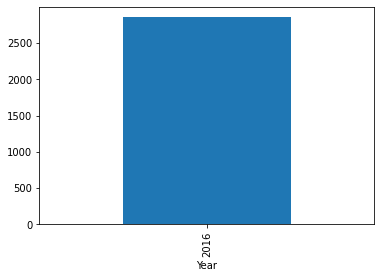

In [52]:
year_wise_total_medal.plot(kind='bar');

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


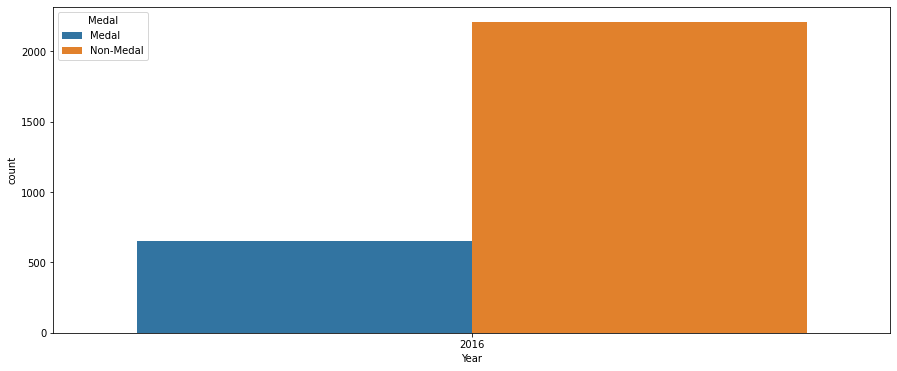

In [53]:
plt.figure(figsize=(15,6))
sns.countplot(df['Year'], hue=df['Medal']);

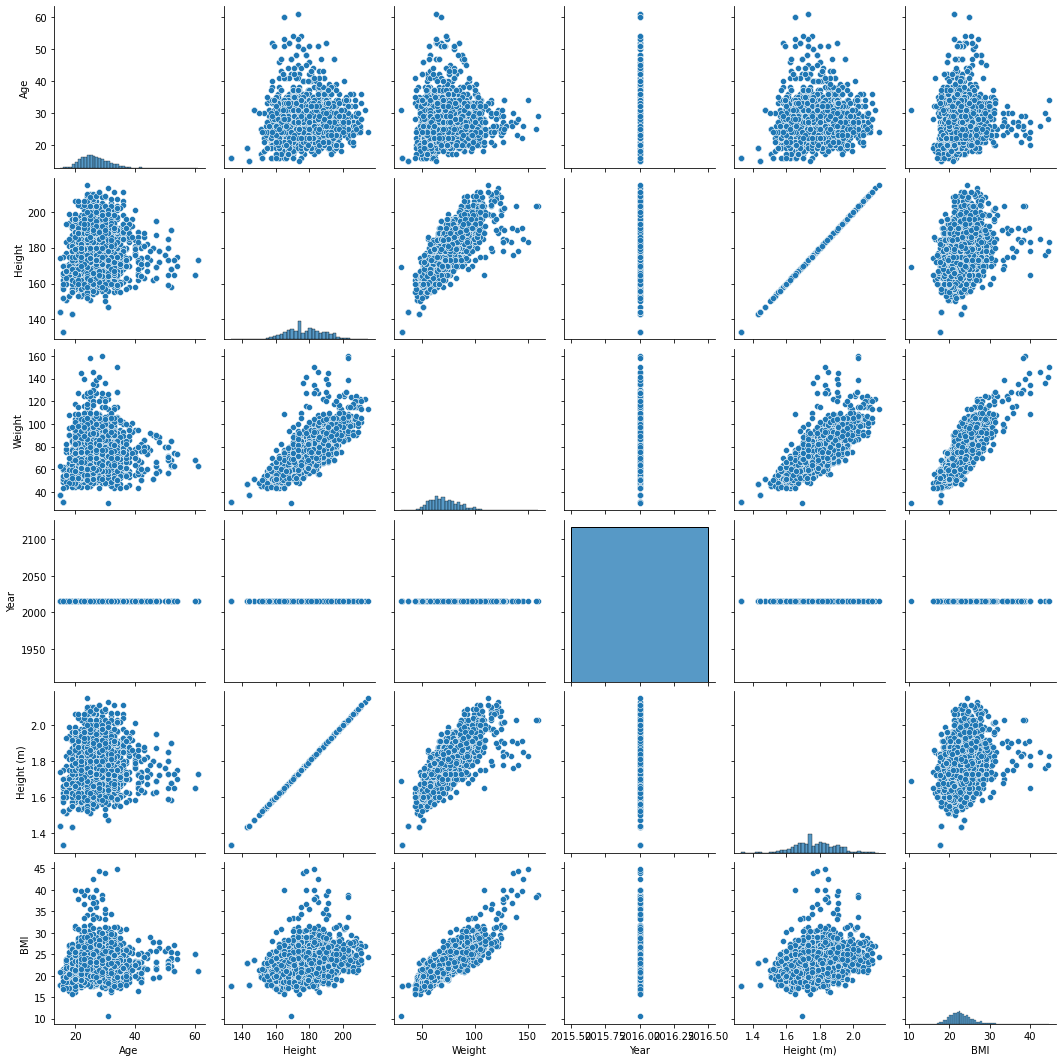

In [55]:
sns.pairplot(df)

# THANK YOU